**LOADING THE DATASET**

In [ ]:
import pandas as pd

# For red wine:
df = pd.read_csv('winequality-red.csv', sep=';')

# For white wine (if using white wine):
# df = pd.read_csv('winequality-white.csv', sep=';')

df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


The dataset has 12 columns: 11 features and 1 target (quality).

The features include physicochemical properties like pH, alcohol, citric acid, etc.

Target variable quality ranges from 3 to 8 (in most cases), which is a discrete ordinal variable.

**BASIC INFORMATION**

In [ ]:
# Shape and data types
df.shape
df.info()

# Summary statistics
df.describe()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


The dataset contains 1599 rows and 12 columns.

All features are numerical (either float or int).

No missing values, so no need for imputation.

Features like residual sugar, free sulfur dioxide, and alcohol show higher variance in describe() output.

**CLASS DISTRIBUTION**

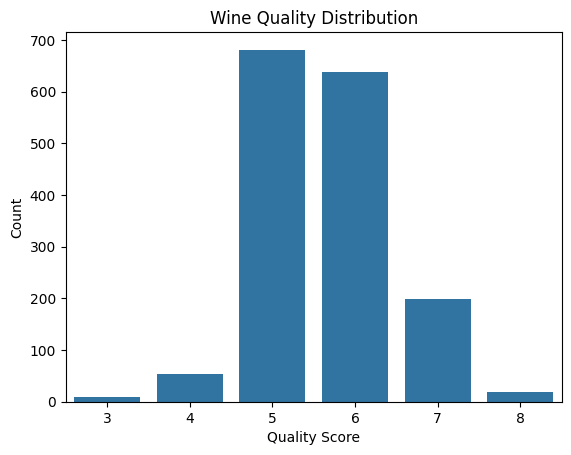

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='quality', data=df)
plt.title("Wine Quality Distribution")
plt.xlabel("Quality Score")
plt.ylabel("Count")
plt.show()


Most wine samples have a quality score of 5, 6, or 7.

The dataset is imbalanced, with fewer samples for qualities like 3, 4, and 8.

You may consider merging classes for classification (e.g., low [3-5], medium [6], high [7-8]).

**CORRELATION HEATMAP**

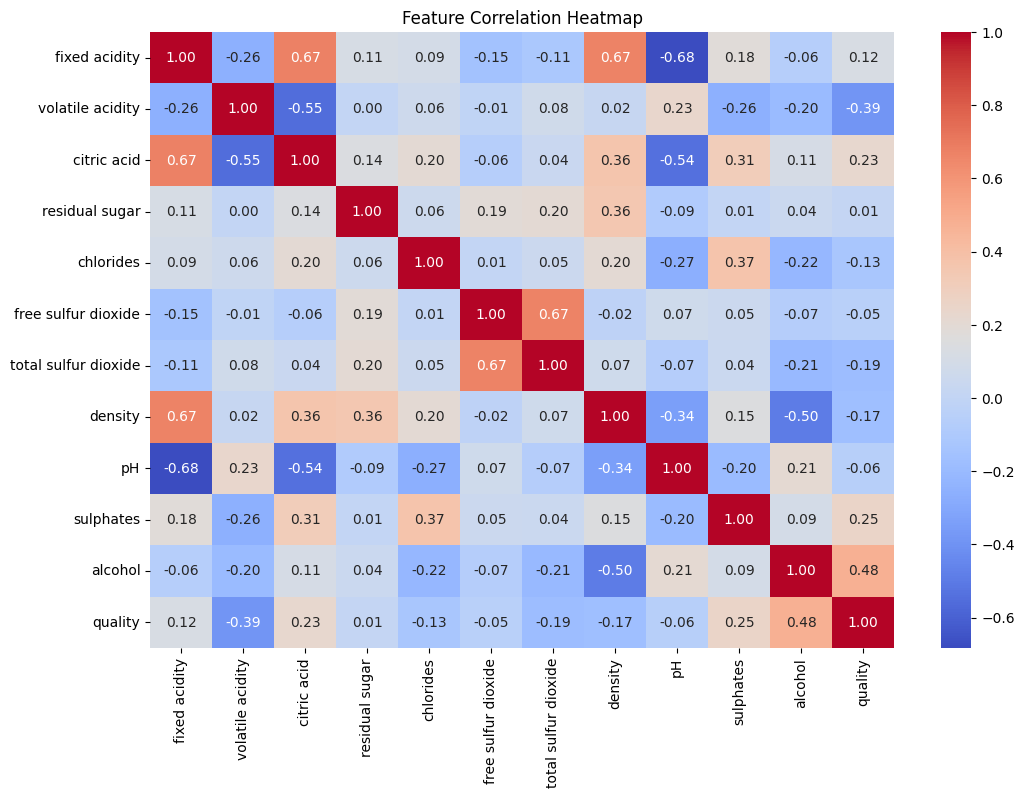

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


Alcohol has the strongest positive correlation with quality.

Volatile acidity has a strong negative correlation with quality.

Some features are correlated with each other (e.g., citric acid and fixed acidity), which could affect model performance due to multicollinearity.

**DISTRIBUTION OF FEATURES**

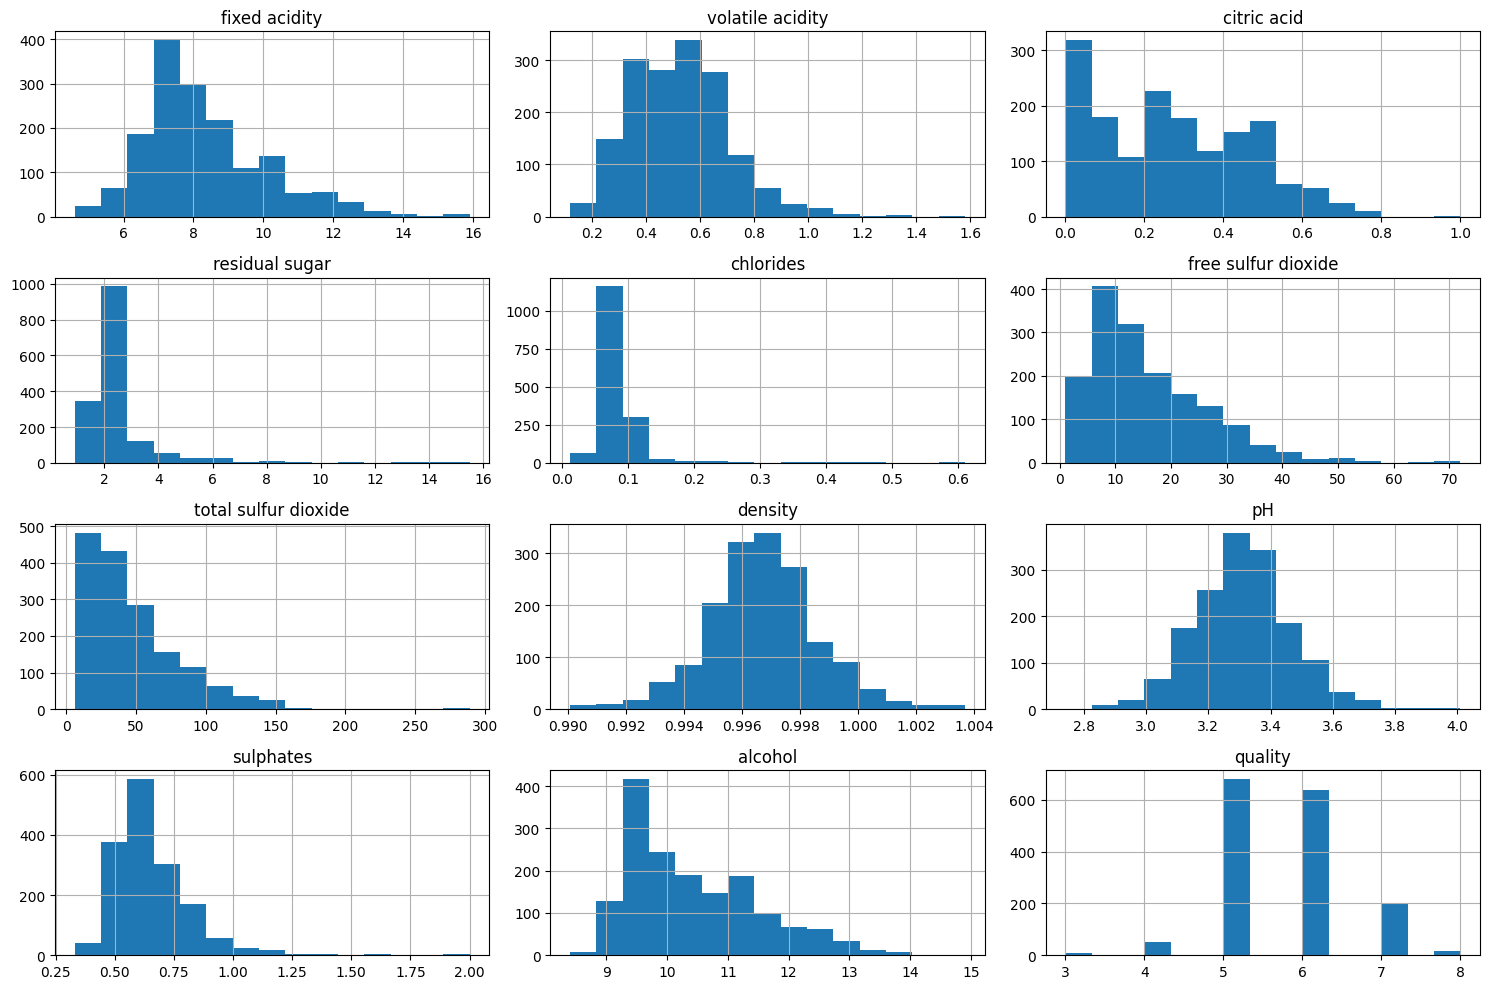

In [ ]:
df.hist(bins=15, figsize=(15, 10), layout=(4, 3))
plt.tight_layout()
plt.show()


Most features are right-skewed (e.g., residual sugar, free sulfur dioxide).

Alcohol is approximately normally distributed.

Knowing the skewness helps decide whether to apply log transformations.

**ENCODING**

In [ ]:
# Convert quality scores into 3 categories
def encode_quality(value):
    if value <= 5:
        return "low"
    elif value == 6:
        return "medium"
    else:
        return "high"

df_cleaned['quality_label'] = df_cleaned['quality'].apply(encode_quality)

# Optional: Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_cleaned['quality_label_encoded'] = le.fit_transform(df_cleaned['quality_label'])

df_cleaned[['quality', 'quality_label', 'quality_label_encoded']].head()


,quality,quality_label,quality_label_encoded
0,5,low,1
1,5,low,1
2,5,low,1
3,6,medium,2
4,5,low,1


quality (which ranges from 3 to 8) was converted into 3 classes:

low (3–5)

medium (6)

high (7–8)

This transformation:

Simplifies the problem into a classification task.

Balances the class distribution better than keeping all 6–7 quality levels.

Label encoding converts categorical labels to numeric values:

low → 1, medium → 0, high → 2 (or similar depending on your LabelEncoder).

This step is not needed for regression.

**BOXPLOT**

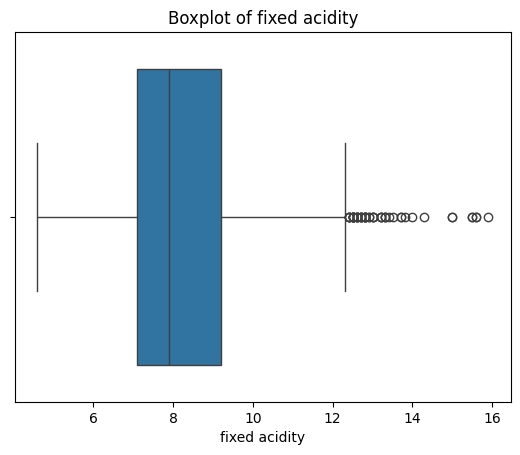

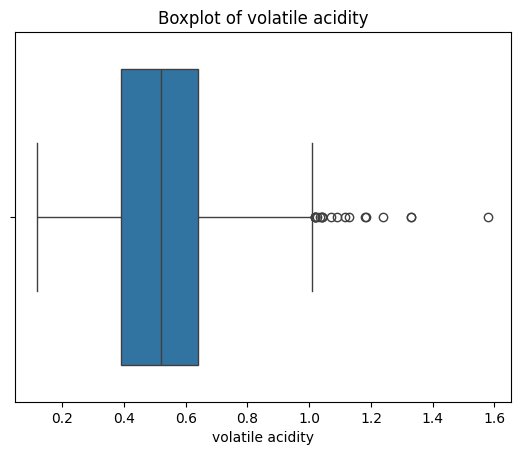

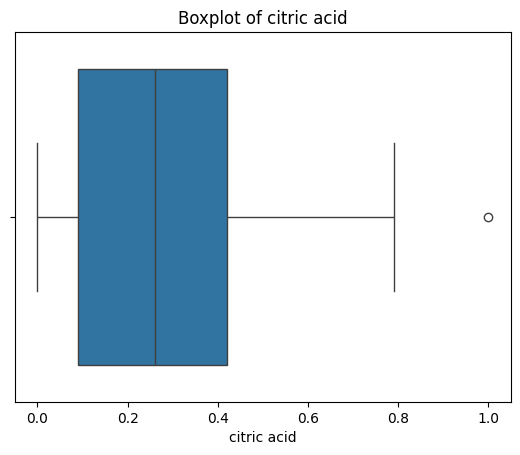

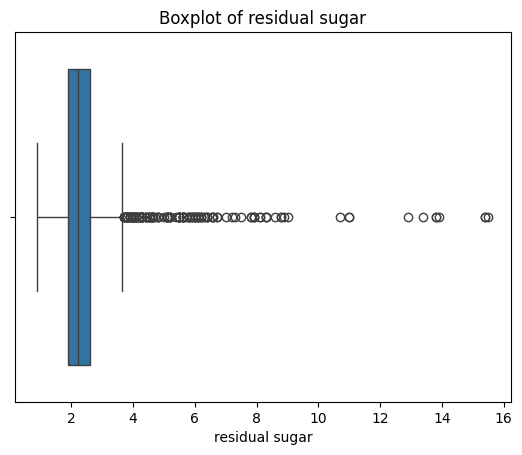

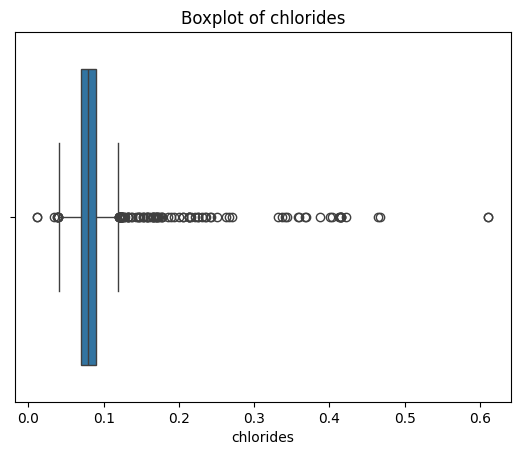

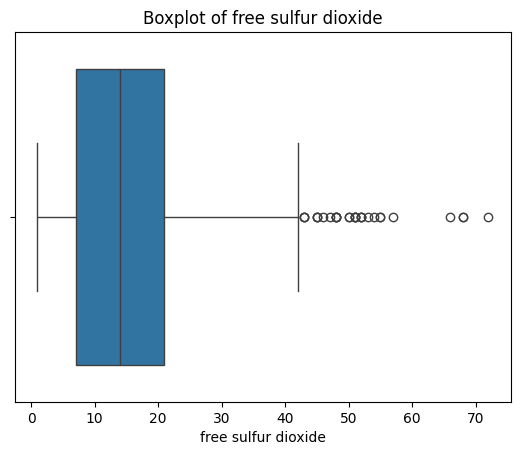

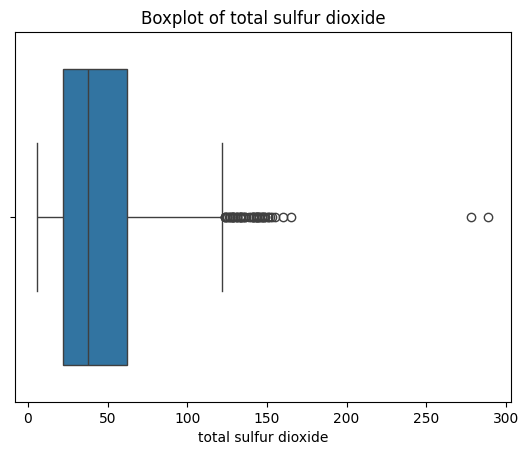

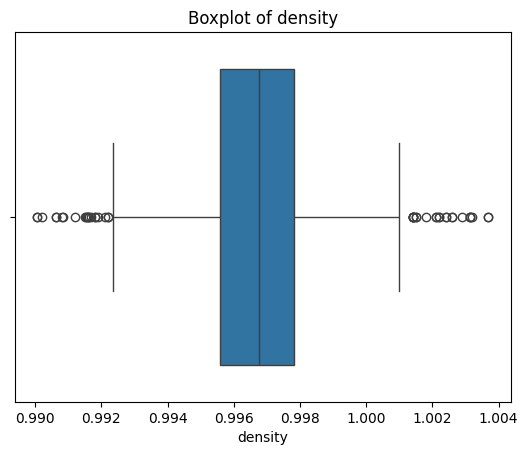

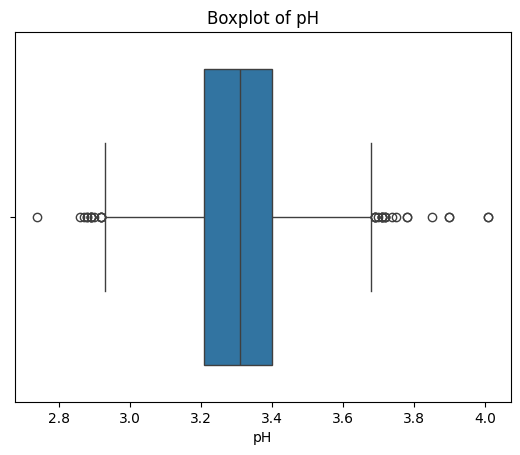

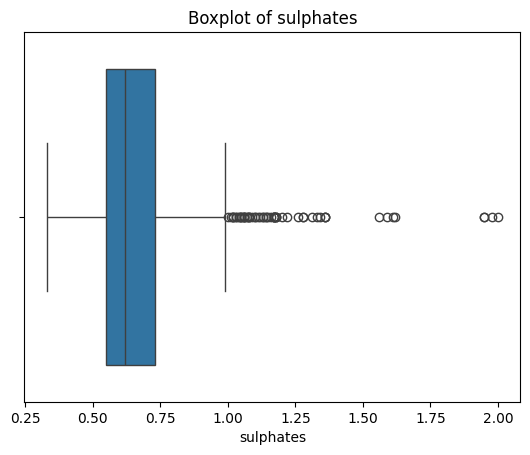

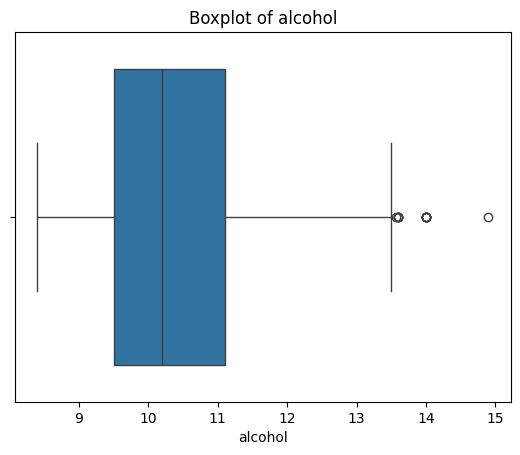

In [ ]:
for column in df.columns[:-1]:  # Skip 'quality'
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column}")
    plt.show()


Several features contain outliers, especially:

residual sugar

free sulfur dioxide

total sulfur dioxide

These outliers may affect model performance and should be treated (e.g., capping, scaling).

**REMOVING OUTLIERS**

In [ ]:
# Create a copy of the dataset
df_cleaned = df.copy()

# Remove outliers using IQR method
Q1 = df_cleaned.quantile(0.25)
Q3 = df_cleaned.quantile(0.75)
IQR = Q3 - Q1

# Define a filter that excludes outliers
filter = ~((df_cleaned < (Q1 - 1.5 * IQR)) | (df_cleaned > (Q3 + 1.5 * IQR))).any(axis=1)
df_cleaned = df_cleaned[filter]

print("Original shape:", df.shape)
print("After outlier removal:", df_cleaned.shape)


Original shape: (1599, 12)
After outlier removal: (1179, 12)


You will typically lose 10–20% of rows depending on the IQR filter.

This makes your dataset cleaner and less noisy.

**PAIRPLOT**

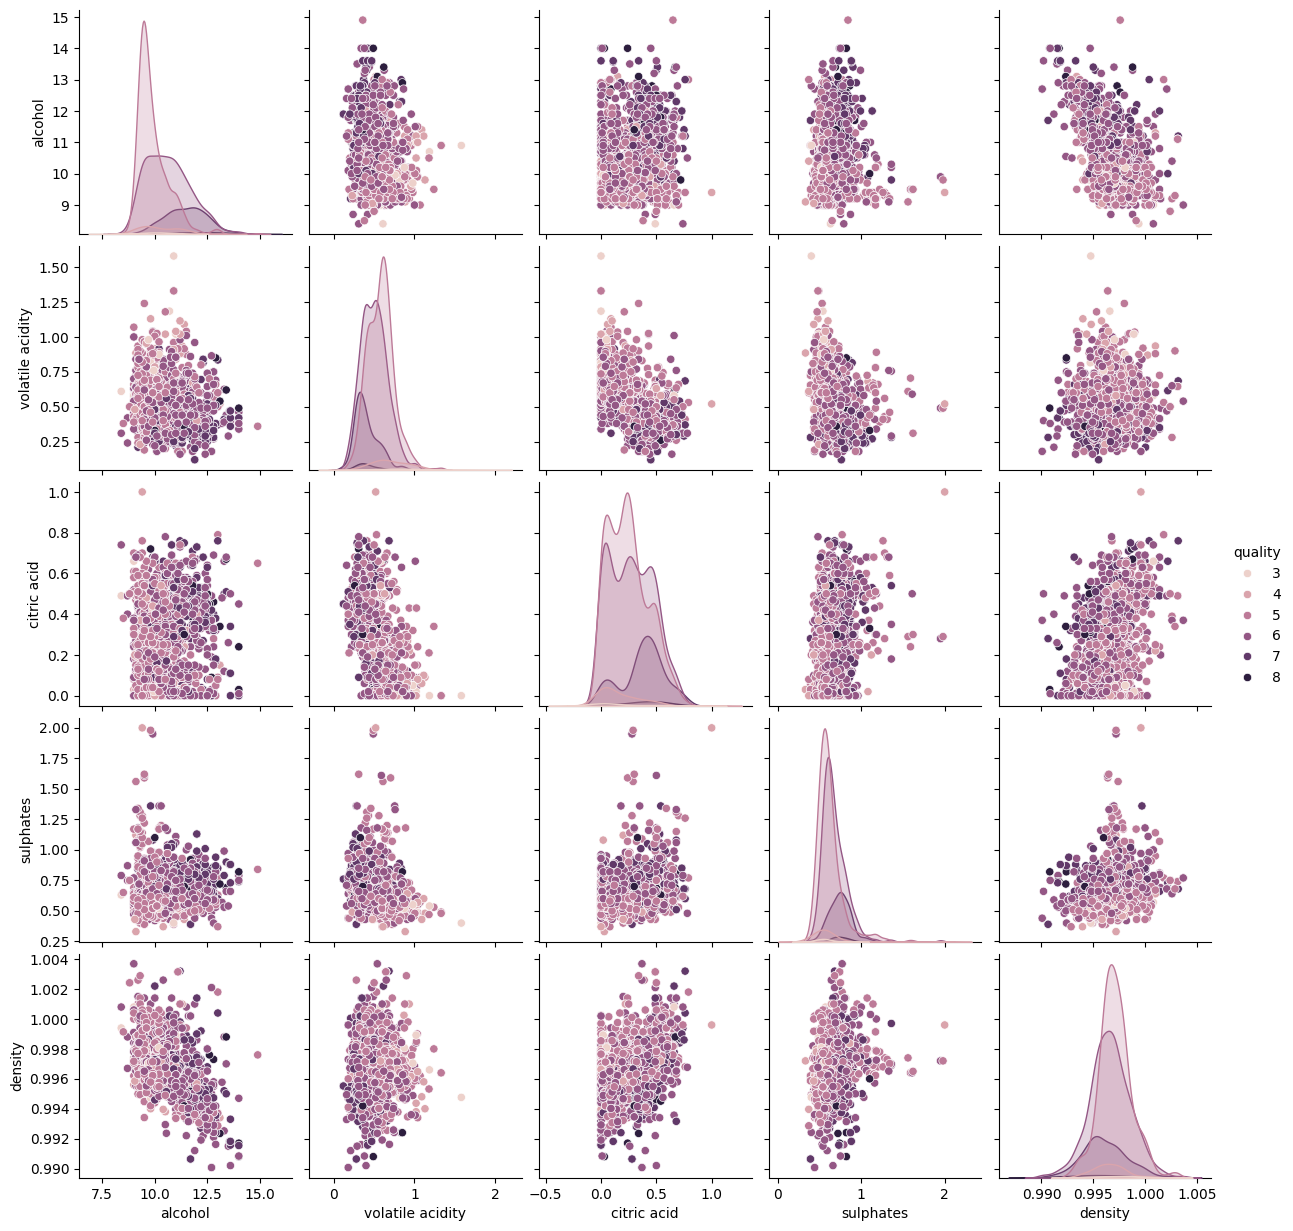

In [ ]:
sns.pairplot(df, vars=['alcohol', 'volatile acidity', 'citric acid', 'sulphates', 'density'], hue='quality')
plt.show()


Higher quality wines tend to have higher alcohol and lower volatile acidity.

No clear separation in most feature pairs, suggesting the need for advanced models or feature engineering.

Scatterplots indicate non-linear relationships, which simpler models might miss.

**GROUP ANALYSIS**

In [ ]:
# Mean of each feature per quality level
df.groupby('quality').mean()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


Quality increases with alcohol and sulphates.

Volatile acidity and density tend to decrease with quality.

These features may be good predictors of quality.

**SKEWNESS AND KURTOSIS**

In [ ]:
from scipy.stats import skew, kurtosis

for col in df.columns[:-1]:
    print(f'{col}: Skew = {skew(df[col]):.2f}, Kurtosis = {kurtosis(df[col]):.2f}')


fixed acidity: Skew = 0.98, Kurtosis = 1.12
volatile acidity: Skew = 0.67, Kurtosis = 1.22
citric acid: Skew = 0.32, Kurtosis = -0.79
residual sugar: Skew = 4.54, Kurtosis = 28.52
chlorides: Skew = 5.68, Kurtosis = 41.58
free sulfur dioxide: Skew = 1.25, Kurtosis = 2.01
total sulfur dioxide: Skew = 1.51, Kurtosis = 3.79
density: Skew = 0.07, Kurtosis = 0.93
pH: Skew = 0.19, Kurtosis = 0.80
sulphates: Skew = 2.43, Kurtosis = 11.68
alcohol: Skew = 0.86, Kurtosis = 0.20


Features like residual sugar and free sulfur dioxide have high skewness, indicating they are not normally distributed.

Features with high kurtosis have more outliers or extreme values.

You may apply normalization, standardization, or log transformation.

**CORRELATION WITH TARGET VARIABLE**

In [ ]:
corr_target = df.corr()['quality'].drop('quality')
corr_target.sort_values(ascending=False)


,quality
alcohol,0.476166
sulphates,0.251397
citric acid,0.226373
fixed acidity,0.124052
residual sugar,0.013732
free sulfur dioxide,-0.050656
pH,-0.057731
chlorides,-0.128907
density,-0.174919
total sulfur dioxide,-0.185100


Features with strongest correlations:

Positive: alcohol, sulphates, citric acid

Negative: volatile acidity, density

These features should be given priority in feature selection or model interpretation.

**FEATURE SCALING**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Drop original quality columns if needed
X = df_cleaned.drop(['quality', 'quality_label', 'quality_label_encoded'], axis=1, errors='ignore')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled_df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.522760,1.077803,-1.375744,-0.647508,-0.180706,-0.457421,-0.316839,0.763633,1.407839,-0.614084,-0.986764
1,-0.248346,2.174284,-1.375744,0.940570,1.356569,1.135446,0.947754,0.135771,-0.946440,0.419963,-0.571630
2,-0.248346,1.443297,-1.152735,0.259965,0.937312,-0.002316,0.449581,0.261343,-0.490773,0.161451,-0.571630
3,2.084173,-1.480652,1.746386,-0.647508,-0.250582,0.225236,0.679507,0.889206,-1.250217,-0.441743,-0.571630
4,-0.522760,1.077803,-1.375744,-0.647508,-0.180706,-0.457421,-0.316839,0.763633,1.407839,-0.614084,-0.986764


Features were scaled so that each has a mean of 0 and standard deviation of 1.

Standardization is essential because:

Features like alcohol and sulphates had much higher ranges than features like pH or density.

Algorithms like SVM, Logistic Regression, and KNN are sensitive to feature magnitude.

Scaling also improves gradient-based model performance (like in neural nets).

**STANDARDIZATION**

In [ ]:
# Separate features and target
X = df.drop('quality', axis=1)
y = df['quality']

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


In [ ]:
X_scaled_df.describe().T


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,3.554936e-16,1.000313,-2.137045,-0.700719,-0.241094,0.505795,4.355149
volatile acidity,1599.0,1.733031e-16,1.000313,-2.278280,-0.769931,-0.043689,0.626688,5.877976
citric acid,1599.0,-8.887339e-17,1.000313,-1.391472,-0.929318,-0.056360,0.765247,3.743574
residual sugar,1599.0,-1.244227e-16,1.000313,-1.162696,-0.453218,-0.240375,0.043416,9.195681
chlorides,1599.0,3.732682e-16,1.000313,-1.603945,-0.371229,-0.179946,0.053845,11.127035
free sulfur dioxide,1599.0,-6.221137e-17,1.000313,-1.422500,-0.848716,-0.179300,0.490115,5.367284
total sulfur dioxide,1599.0,4.443669e-17,1.000313,-1.230584,-0.744040,-0.257497,0.472318,7.375154
density,1599.0,-3.473172e-14,1.000313,-3.538731,-0.607756,0.001760,0.576825,3.680055
pH,1599.0,2.861723e-15,1.000313,-3.700401,-0.655141,-0.007213,0.575922,4.528282
sulphates,1599.0,6.754377e-16,1.000313,-1.936507,-0.638220,-0.225128,0.424016,7.918677


In [ ]:
for col in X_scaled_df.columns:
    s = skew(X_scaled_df[col])
    print(f'{col:25} | Skewness: {s:.2f}')


fixed acidity             | Skewness: 0.98
volatile acidity          | Skewness: 0.67
citric acid               | Skewness: 0.32
residual sugar            | Skewness: 4.54
chlorides                 | Skewness: 5.68
free sulfur dioxide       | Skewness: 1.25
total sulfur dioxide      | Skewness: 1.51
density                   | Skewness: 0.07
pH                        | Skewness: 0.19
sulphates                 | Skewness: 2.43
alcohol                   | Skewness: 0.86


In [ ]:
import numpy as np
# Example: Apply log1p to residual sugar and free sulfur dioxide
df['residual sugar'] = np.log1p(df['residual sugar'])
df['free sulfur dioxide'] = np.log1p(df['free sulfur dioxide'])


In [ ]:
# Separate features and target
X = df.drop('quality', axis=1)
y = df['quality']

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)



In [ ]:
import numpy as np

skewed_features = ['residual sugar', 'chlorides', 'sulphates',
                   'free sulfur dioxide', 'total sulfur dioxide',
                   'fixed acidity', 'volatile acidity', 'alcohol']

# Apply log1p transformation
df_log = df.copy()
for feature in skewed_features:
    df_log[feature] = np.log1p(df_log[feature])


In [ ]:
from scipy.stats import skew

X_log_scaled = StandardScaler().fit_transform(df_log.drop('quality', axis=1))
X_log_scaled_df = pd.DataFrame(X_log_scaled, columns=df_log.columns[:-1])

# Check skewness again
for col in X_log_scaled_df.columns:
    s = skew(X_log_scaled_df[col])
    print(f'{col:25} | Skewness: {s:.2f}')


fixed acidity             | Skewness: 0.46
volatile acidity          | Skewness: 0.27
citric acid               | Skewness: 0.32
residual sugar            | Skewness: 1.66
chlorides                 | Skewness: 5.07
free sulfur dioxide       | Skewness: -0.48
total sulfur dioxide      | Skewness: -0.04
density                   | Skewness: 0.07
pH                        | Skewness: 0.19
sulphates                 | Skewness: 1.61
alcohol                   | Skewness: 0.68


In [ ]:
from scipy.stats import boxcox

df_log['chlorides'], _ = boxcox(df['chlorides'] + 1e-6)  # add small value to avoid 0
df_log['sulphates'], _ = boxcox(df['sulphates'] + 1e-6)


In [ ]:
df_log['residual sugar'] = np.sqrt(df['residual sugar'])


In [ ]:
X_final = df_log.drop('quality', axis=1)
X_scaled_final = StandardScaler().fit_transform(X_final)

# Check skewness again
from scipy.stats import skew
for col, val in zip(X_final.columns, skew(X_scaled_final)):
    print(f"{col:25} | Skewness: {val:.2f}")


fixed acidity             | Skewness: 0.46
volatile acidity          | Skewness: 0.27
citric acid               | Skewness: 0.32
residual sugar            | Skewness: 1.75
chlorides                 | Skewness: -0.50
free sulfur dioxide       | Skewness: -0.48
total sulfur dioxide      | Skewness: -0.04
density                   | Skewness: 0.07
pH                        | Skewness: 0.19
sulphates                 | Skewness: -0.02
alcohol                   | Skewness: 0.68
